# Part 3: Predictive Modelling

Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in 
January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    

We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    

The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge.

------------------------------------------------------------------------------------------------------

First, let's load the data into a Dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import sklearn

In [2]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

*1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?*

In [3]:
display(df.shape)
display(df.info())
display(df.columns)

(50000, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


None

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

We notice that out of the 12 columns, 3 have null values: avg_rating_by_driver, avg_rating_of_driver, and phone. avg_rating_of_driver is missing the most values by far. While the other columns are missing a few hundred values, avg_rating_of_driver is missing about 8000 values.

In [4]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


Let's check the fraction of drivers who were retained.

Relevant column: last_trip_date

In [7]:
df.last_trip_date[0]

'2014-06-17'

We need to convert its string format to date format (as well as for signup_date). Let's do that.

In [8]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [10]:
df['last_trip_date'].describe(datetime_is_numeric=True)

count                            50000
mean     2014-04-19 08:02:04.992000256
min                2014-01-01 00:00:00
25%                2014-02-14 00:00:00
50%                2014-05-08 00:00:00
75%                2014-06-18 00:00:00
max                2014-07-01 00:00:00
Name: last_trip_date, dtype: object

So the last 'last_trip_date' occured on the first day of July at midnight. Therefore, when we are checking the fraction of users who were retained, we are checking the fraction of users who were active in June (since June has 30 days). So let's check that.

In [11]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= '2014-06-01').count()
fraction_retained

0.37608

So 37.608% of users were retained.

Let's create a column 'was_retained' based on our finding. This column will be our target column/variable for the modelling.

In [12]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


There isn't really much more cleaning we need to do right now. If we notice something is off in the data while doing EDA or modelling, we can come back and clean it, but based on our summaries of the data so far, it looks OK. We could drop the rows with null values or fill them in with interpolation, but I don't see the need to do that before we get to a stage where we need to. We will have better information about what to do with null values if or when we get to that stage.

Let's do some basic EDA showing relationships between our features and our new, created target variable.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  was_retained            50000 non-null  int32 

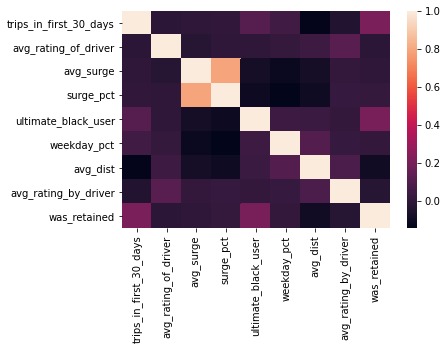

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
corr = df.corr()
ax = sns.heatmap(corr)
plt.show()

In [15]:
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: was_retained, dtype: float64

So we see that whether a user was retained or not is somewhat correlated with the number of trips in the user's first 30 days and whether they are an Ultimate Black user or not. There isn't much correlation or anti-correlation with anything else.

We haven't yet seen though what the relationship is between was_retained and our non-numeric columns: city, phone, and the two date columns. Let's try doing that here.

In [16]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

Only 3 cities.

In [17]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

Only 2 phones.

Both columns have string values. The best way to handle these 2 columns is to one-hot-encode them. We don't have to worry about our dimensionality increasing substantially because both columns have so few values.

Before we can continue though, we must fill in the null values for the phone column so that we can one-hot-encode them properly in scikit-learn when we need to.

In [18]:
(df.phone[df.phone.isnull()]).value_counts()

Series([], Name: phone, dtype: int64)

In [19]:
df.phone.fillna('Other', inplace=True)
df.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

So we've replaced Nulls with 'Other'. 

In [20]:
cities_ohe = pd.get_dummies(df['city'])
phones_ohe = pd.get_dummies(df['phone'])

In [21]:
df = df.join(cities_ohe).join(phones_ohe)

In [22]:
df.drop(['city', 'phone'], axis=1, inplace=True)

In [23]:
# move 'was_retained' to the end
col_at_end = ['was_retained']
df = df[[c for c in df if c not in col_at_end]
       + [c for c in col_at_end if c in df]]

In [24]:
df.describe().iloc[:, -7:-1]

,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see about 33% of users are from Astapor, about 20% are from King's Landing, and the rest are from Winterfell. Meanwhile, about 70% of users use an iPhone, while almost all the rest use Android. A miniscule percentage don't use either.

Let's look for correlations like we did earlier.

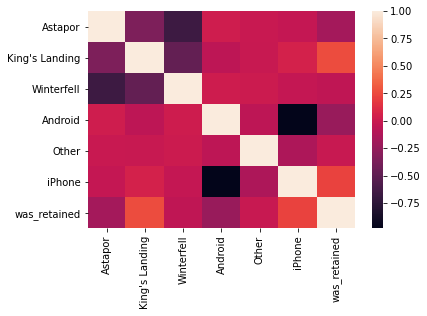

In [25]:
categoricals = df.iloc[:,-7:]
fig = plt.figure()
ax = plt.subplot(111)
corr = categoricals.corr()
ax = sns.heatmap(corr)
plt.show()

In [26]:
corr['was_retained'].sort_values(ascending=False)

was_retained      1.000000
King's Landing    0.262284
iPhone            0.225244
Other            -0.007419
Winterfell       -0.046611
Astapor          -0.174655
Android          -0.225464
Name: was_retained, dtype: float64

We see that being from King's Landing and using an iPhone are associated with being retained. Being from Astapor or Winterfell or using an Android are negatively associated with retention.

With regard to the 2 date columns, if we want to see their correlation with retention, we need to first encode them numerically. We will check how much each is correlated with retention. Obviously, we expect last_trip_date to have a high correlation with retention because the retention column was created from last_trip_date. In the actual model, we will remove last_trip_date in order to prevent it from giving us artificially good performance.

In [27]:
df.signup_date.describe()

<ipython-input-27-9de9b943d4a9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.signup_date.describe()


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [28]:
df.last_trip_date.describe()

<ipython-input-28-65c97afa6614>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.last_trip_date.describe()


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [29]:
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100

In [30]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone,was_retained
0,4,25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,0,1,0,0,0,1,1
1,0,29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,1,0,0,1,0,0,0
2,3,6,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1,0,0,0,0,1,0
3,9,10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,0,1,0,0,0,1,1
4,14,27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,1,1,0,0,0


In [31]:
df['signup_date'].corr(df['was_retained'])

-0.020210618434848227

So it looks like signup date is not really correlated with retention. Let's see about last_trip_date. This should be **very** correlated.

In [32]:
ref = min(df['last_trip_date'])
df['last_trip_date'] = (df['last_trip_date'] - ref).dt.days + 1 # We add 1 because takes the number of days since the first day, not since last year

In [33]:
df['last_trip_date'].corr(df['was_retained'])

0.7808374961937263

As we expected. Very high correlation.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  int32  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   last_trip_date          50000 non-null  int64  
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  Astapor                 50000 non-null  uint8  
 11  King's Landing          50000 non-null  uint8  
 12  Winterfell              50000 non-null  uint8  
 13  Android                 50000 non-null  uint8  
 14  Other                   50000 non-null

Let's convert the ultimate_black_user column to int so it shows up with the describe method.

In [35]:
df['ultimate_black_user'] = df['ultimate_black_user']*1

In [36]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Astapor,King's Landing,Winterfell,Android,Other,iPhone,was_retained
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,16.54468,4.601559,1.074764,109.334780,8.849536,0.37708,60.926084,5.796827,4.778158,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640,0.376080
std,3.792684,8.75422,0.617338,0.222336,61.718985,19.958811,0.48466,37.081503,5.707357,0.446652,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821,0.484405
min,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.00000,4.300000,1.000000,45.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,17.00000,4.900000,1.000000,128.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,24.00000,5.000000,1.050000,169.000000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,125.000000,31.00000,5.000000,8.000000,182.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


At this point, we have looked at the relationship between every feature and our created target column 'was_retained'. To handle the 'city' and 'phone' categorical columns we needed to one-hot-encode the features first, and to handle the date columns, we simply converted those columns to the number of days into 2014.

Also, all of our features are numeric now, so we are ready for modelling.

___

*2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.*

### Steps Involved in Classification in Scikit-Learn

1. Preprocess Data
2. Create Train and Test Sets
3. Instantiate the model/estimator  
(Steps 1 and 3 can be combined in a Pipeline object)
4. Specify Hyperparameter Space
5. Instantiate GridSearchCV or RandomizedSearchCV objects
6. Fit CV object to the Training Set
7. Predict on the Test Set
8. Compute Scores for the Model

*Models*:
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Trees (DT)
5. Random Forest (RF)
6. Naive Bayes (NB)

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In keeping with best practice, let's create the whole model using sklearn's Pipeline object. We will repull the data to do this.

In [38]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  int32  
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  int64  
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  was_retained            50000 non-null  int32  
dtypes: bool(1), float64(6), int32(2), int64(2), object(2)
memory usage: 4.2+ MB


We will train our classifier with the following features:
1. Categorical Features:
    1. city
    2. phone
2. Numeric Features: Every other feature


We create the preprocessing pipelines for both numeric and categorical data.

In [40]:
#### Step 1) Preprocess Data

np.random.seed(0)

df.phone.fillna('Other', inplace=True)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
]
)

numeric_features = [column for column in df.columns.tolist() if column not in categorical_features and
                    column not in ['last_trip_date', 'was_retained']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
]
)

In [41]:
#### Step 2) Split Data into Training and Test Sets
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Before we proceed further, we prepare a dataframe the will store the different scoring metrics that we will score each model with:

In [42]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes'])

In [43]:
metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Decision Tree,Random Forest,Naive Bayes
accuracy,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN,NaN,NaN
Time to Train,NaN,NaN,NaN,NaN,NaN,NaN


Here we define a useful function for training and scoring our models.

In [44]:
# Steps 5 - 8:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5,zero_division=1):
    ##, iid=False
    #### Step 5: Instantiate the CV Object
    
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv)
         ##, iid=False
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv,  random_state=None)
        ## iid=False,

    #### Step 6: Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    #### Step 7: Predict on Test

    y_pred = cv.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test,zero_division=zero_division)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()

    return cv

In [45]:
def Conf_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint


# Step 3: Instantiate the model/estimator
classifier_dm = DummyClassifier(strategy="most_frequent", random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
#classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()

#classifiers = [classifier_dm, classifier_lr, classifier_knn, classifier_svm, classifier_dt, classifier_rf, classifier_nb]
classifiers = [classifier_dm, classifier_lr, classifier_knn,  classifier_dt, classifier_rf, classifier_nb]

# Step 4: Specify the Hyperparameter Space
param_grid_dm = None
param_grid_lr = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}
param_grid_knn = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': np.arange(1,20)
}
'''
param_grid_svm = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
    
    
}'''
param_grid_dt = {
                'preprocessor__num__imputer__strategy': ['mean', 'median'],
                'classifier__max_depth': [3, 10, 20, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__min_samples_split': randint(2, 9),
                'classifier__criterion': ["gini", "entropy"]
}
param_grid_rf = {
                 'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                 'classifier__n_estimators': [50, 100],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
}
param_grid_nb = None

#param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, param_grid_svm, param_grid_dt, param_grid_rf, param_grid_nb]
param_grids = [param_grid_dm, param_grid_lr, param_grid_knn,  param_grid_dt, param_grid_rf, param_grid_nb]

model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors',  'Decision Tree', 'Random Forest', 'Naive Bayes']
cv_names = ['dm_cv', 'lr_cv', 'knn_cv',  'dt_cv', 'rf_cv', 'nb_cv']
cvs = [None, 5, 5, 5, 5, 5, 5]

Append classifier to preprocessing pipeline. Now we have a full prediction pipeline.

In [47]:
# too much time next sentence

It takes 0.209 seconds for Dummy Model fitting
Accuracy with Dummy Modelon the testing set is: 0.624
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          9359         0   9359
Retained              5641         0   5641
Total                15000         0  15000
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      9359
           1       0.00      0.00      0.00      5641

    accuracy                           0.62     15000
   macro avg       0.31      0.50      0.38     15000
weighted avg       0.39      0.62      0.48     15000



d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


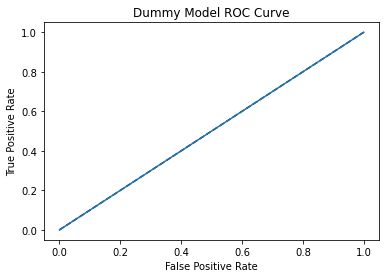

It takes 81.617 seconds for Logistic Regression fitting
Accuracy with Logistic Regressionon the testing set is: 0.716
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7984      1375   9359
Retained              2880      2761   5641
Total                10864      4136  15000
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9359
           1       0.67      0.49      0.56      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



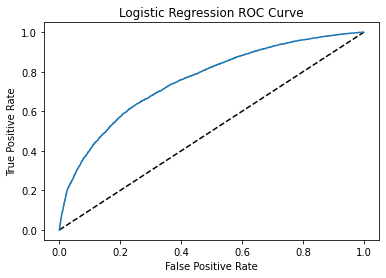

It takes 142.473 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighborson the testing set is: 0.750
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7739      1620   9359
Retained              2125      3516   5641
Total                 9864      5136  15000
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      9359
           1       0.68      0.62      0.65      5641

    accuracy                           0.75     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.75      0.75      0.75     15000



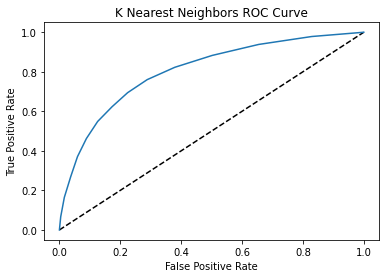

It takes 11.469 seconds for Decision Tree fitting
Accuracy with Decision Treeon the testing set is: 0.765
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7832      1527   9359
Retained              2000      3641   5641
Total                 9832      5168  15000
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      9359
           1       0.70      0.65      0.67      5641

    accuracy                           0.76     15000
   macro avg       0.75      0.74      0.74     15000
weighted avg       0.76      0.76      0.76     15000



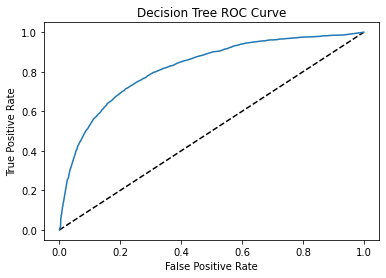

It takes 134.073 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.779
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8036      1323   9359
Retained              1987      3654   5641
Total                10023      4977  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.65      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



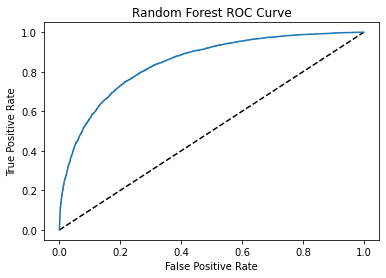

It takes 0.225 seconds for Naive Bayes fitting
Accuracy with Naive Bayeson the testing set is: 0.692
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          6419      2940   9359
Retained              1678      3963   5641
Total                 8097      6903  15000
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      9359
           1       0.57      0.70      0.63      5641

    accuracy                           0.69     15000
   macro avg       0.68      0.69      0.68     15000
weighted avg       0.71      0.69      0.70     15000



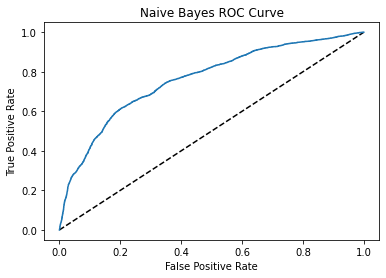

In [48]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                 ('classifier', classifier_dm)])
dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_lr)])
lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_knn)])
knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


'''pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_svm)])
svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)'''


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_dt)])
dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_nb)])
nb_cv = train_and_score_model('Naive Bayes', pipeline, param_grid_nb)

In [49]:
from pandas.plotting import table
metrics.astype(float).round(3)
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100
actual_metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Decision Tree,Random Forest,Naive Bayes
accuracy,62.4,71.6,75.0,76.5,77.9,69.2
precision,100.0,66.8,68.5,70.5,73.4,57.4
recall,0.0,48.9,62.3,64.5,64.8,70.3
AUC,50.0,75.7,80.4,82.1,84.7,76.1


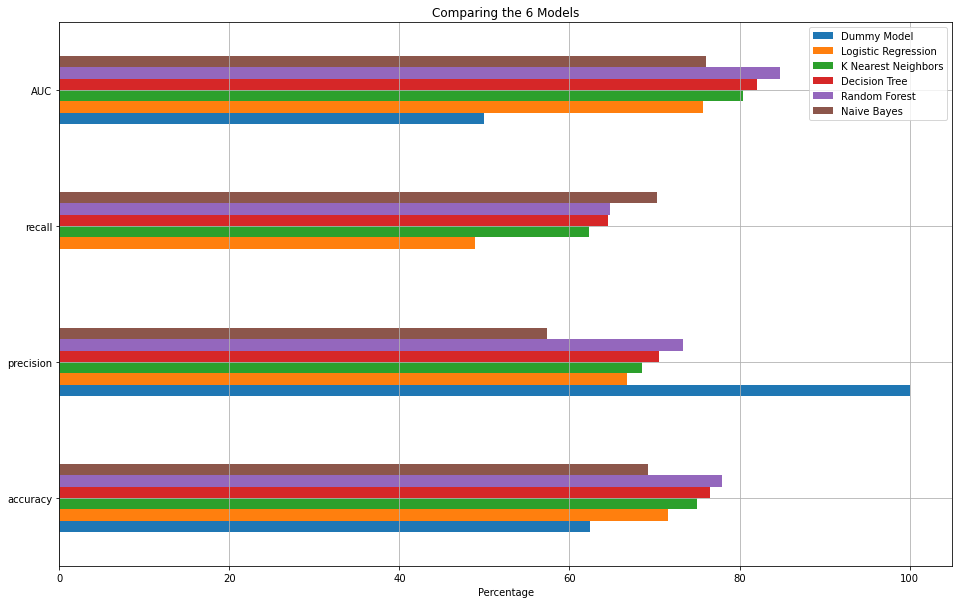

In [50]:
fig, ax = plt.subplots(figsize=(16,10))
actual_metrics.plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage')
ax.set_title('Comparing the 6 Models')
ax.grid();

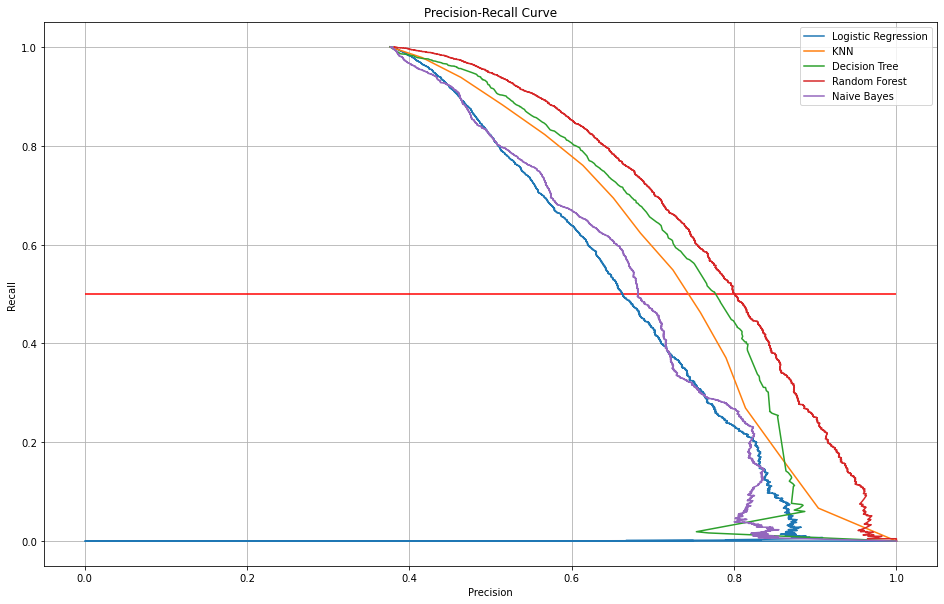

In [51]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=lr_cv.predict_proba(X_test)[:,1])
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=y_test, probas_pred=knn_cv.predict_proba(X_test)[:,1])
#precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true=y_test, probas_pred=svm.predict_proba(X_test)[:,1])
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test, probas_pred=dt_cv.predict_proba(X_test)[:,1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test, probas_pred=rf_cv.predict_proba(X_test)[:,1])
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=nb_cv.predict_proba(X_test)[:,1])

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(precision_lr, recall_lr, label='Logistic Regression')
ax.plot(precision_knn, recall_knn, label='KNN')
ax.plot(precision_dt, recall_dt, label='Decision Tree')
ax.plot(precision_rf, recall_rf, label='Random Forest')
ax.plot(precision_nb, recall_nb, label='Naive Bayes')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [52]:
#metrics.to_csv('metrics')

We see that Random Forest produces the best model, with an accuracy of about 78%. This is about 15.5% better than the Dummy Model which just predicts that the user was not retained for every user. So it's a sizable improvement. In addition to having the highest accuracy of any model, we also see that is has the best AUC score of any model, or the best tradeoff between True positive rate and False positive rate. Note that here, 'positive rate' is defined as the rate at which we correctly identify 'retained'. That is, we consider the positive class to be the retained customers, and the negative class to be the customers who were not retained. Also note that we have no AUC score for our SVM model because the SVC class in scikit-learn does not have a predict_proba method.

We don't really need to look at the precision and recall scores because they are captured in the AUC scores for every model. And since Random Forest has the best AUC score and best accuracy, it is our best model. 

Note that we are able to achieve better or worse results for accuracy, precision, and recall by varying the probability at which we classify retention. By default, the probability threshold is set at 50%, as this is the intuitive level for classification. But if we cared more about recall, for example, we would lower the threshold for classification to make sure that we classified as retained more of the customers who were actually retained. This would come at the price of precision. 
Correspondingly, if we cared more about precision, we would raise the probability threshold.

In our scenario, in order to determine which one we care more about maximizing, we have to ask ourselves the folowing question:
What do we want to avoid more: predicting that a retained customer will not be retained (false negatives)? Or predicting that a non-retained customer will be retained (false positives)? A good case can be made for each. Since we don't have enough information to make that decision, we will not adjust the threshold.

This is a good place to recap what question we were trying to answer and what we have done to answer it.

*Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.*  

We have built several classification models to predict whether customers will be retained or not using the most common classification algorithms. We chose a Random Forest model to be our model for prediction because it produced superior accuracy and AUC scores to all of the other classification models we used. 

In terms of any concerns we have, the biggest concern would be that we might value false negative more highly than false positives or vice-versa. In that case, we would want to adjust the probability threshold for classification to reflect that. In any case, Random Forest remains the best model due to it having the best precision-recall curve of any model.

In terms of model validity, our model is only as accurate as the input data. Also, our model is only as good as we the degree to which we know how to use it. That goes back to the point about precion-recall. First we have to know which we care about more before we can use our model optimally.

Finally, to reiterate the indicators of model performance, we achieved an accuracy of about 78%, and an AUC score of about 84.7%.

*3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).* 

To answer, these questions, we need model interpretability. Fortunately, the Random Forest model provides better interpretability than other models, particularly neural networks.

We have a problem, though, with getting the feature importances for our model, because scikit-learn does not allow us to extract the features from a pipeline object, so we have no way of observing which feature importances correspond to which features. As a result, we need to run our model again, using the optimal parameters that we have already found.

In [53]:
rf_cv.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__max_features': 3,
 'classifier__min_samples_leaf': 7,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 50,
 'preprocessor__num__imputer__strategy': 'median'}

In [54]:
rf_model = rf_cv.best_estimator_

In [55]:
rf_model.named_steps['classifier'].feature_importances_

array([0.07154114, 0.07199194, 0.05093047, 0.06473784, 0.09288438,
       0.05062047, 0.14281036, 0.10772827, 0.13506786, 0.02715218,
       0.08739985, 0.02072585, 0.04104392, 0.00042388, 0.03494159])

We are going to have to refit the model so we can access feature importance with names.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  int32  
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  int64  
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  was_retained            50000 non-null  int32  
dtypes: bool(1), float64(6), int32(2), int64(2), object(2)
memory usage: 4.2+ MB


In [57]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,16.54468,4.601559,1.074764,109.334780,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,8.75422,0.617338,0.222336,61.718985,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.00000,4.300000,1.000000,45.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,17.00000,4.900000,1.000000,128.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,24.00000,5.000000,1.050000,169.000000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,31.00000,5.000000,8.000000,182.000000,100.000000,100.000000,160.960000,5.000000,1.000000


In [58]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1 

df.phone.fillna('Other', inplace=True)
df['city'] = df['city'].astype('category')
df['phone'] = df['phone'].astype('category')
df = pd.get_dummies(df)

In [59]:
# Imputation
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(),inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(),inplace=True)

In [60]:
# Standard Scaling not needed for Random Forest

In [61]:
#### Step 2) Split Data into Training and Test Sets
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [62]:
# Step 3: Instantiate the model/estimator
classifier_rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=20, 
                                       max_features=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100)

It takes 3.051 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.778
ROC AUC score is: 0.848
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8032      1327   9359
Retained              1998      3643   5641
Total                10030      4970  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.65      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



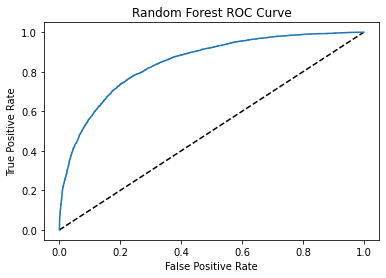

In [63]:
    #### Step 6: Fit on Training
    t0 = time.time()
    classifier_rf.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, 'Random Forest'))

    #### Step 7: Predict on Test

    y_pred = classifier_rf.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + 'Random Forest' + "on the testing set is: %.3f" % classifier_rf.score(X_test, y_test))
    
    y_pred_prob = classifier_rf.predict_proba(X_test)[:,1]
    print("ROC AUC score is: %.3f" %roc_auc_score(y_test, y_pred_prob))

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label='Random Forest')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('%s ROC Curve' % 'Random Forest')
    plt.show()

In [64]:
pd.DataFrame(classifier_rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.151980
weekday_pct,0.130413
surge_pct,0.112422
city_King's Landing,0.098508
avg_dist,0.089670
avg_surge,0.083304
trips_in_first_30_days,0.062173
signup_date,0.059697
ultimate_black_user,0.052550
avg_rating_of_driver,0.041451


So we see that the top 3 features in terms of importance are the rider’s average rating over all of their trips, the percent of trips taken with surge multiplier > 1, and the percent of the user's trip occuring during a weekday.  

In [65]:
display(df['avg_rating_by_driver'].corr(df['was_retained']))
display(df['surge_pct'].corr(df['was_retained']))
display(df['weekday_pct'].corr(df['was_retained']))

-0.026748042806069777

0.011796748066780285

0.009692972843291955

We see that the magnitude of these correlations is quite small. Moreover, the lessons learned are puzzling. Average rating by driver is negatively correlated with retention, meaning that higher rated users are less likely to be retained. The implication is that we would want users to be more poorly rated. Maybe the real insight is that we want users to feel more comfortable, and more comfortable riders are more likely to be lower rated. So the actionable insight would be to encourage drivers to make users feel more comfortable.

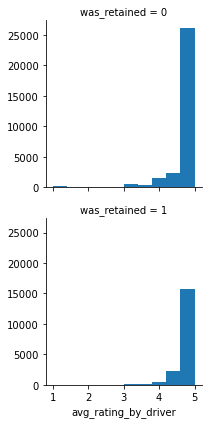

In [66]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "avg_rating_by_driver")

The second most important feature was the percent of trips taken with surge multiplier > 1. We know that this is very slightly positively correlated with retention.

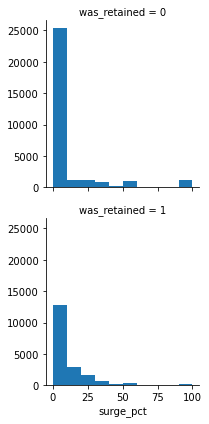

In [67]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "surge_pct")

Since there is no clear connection here, the best we can say is that Ultimate should do more research into the effects of surges on user retention. Perhaps it is charging surge prices too much and that is scaring users away.

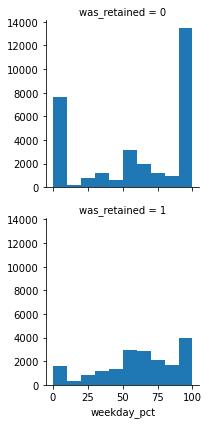

In [68]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "weekday_pct")

For our last important feature, the percents of the user's trips occuring on a weekday, we see that the non-retained user distribution shows far more users who either only use it on the weekend, or only use it during the week. The actionable insight here would for Ultimate to target those users who experience no difference in their need for transportation between the week and the weekend. Those users are retained most.